# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7436988907245973698
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15569183219393043352
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


'2.1.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('../all/train')
DATASET_PATH  = '../all/train'
TEST_DIR =  '../all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 6  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
# raise NotImplementedError("Build your model based on an architecture of your choice "
#                           "A sample model summary is shown below")

# Implement VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

vgg_16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling='None', classes=4)
print(vgg_16.summary())
vgg_16.trainable = False

covid_model = Sequential()
covid_model.add(vgg_16)
covid_model.add(Flatten())
covid_model.add(Dropout(0.4))
covid_model.add(Dense(2048, activation='relu'))
covid_model.add(Dropout(0.3))
covid_model.add(Dense(256, activation='relu'))
covid_model.add(Dense(4, activation='softmax'))

covid_model.build(input_shape=(224, 224, 3))
covid_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### [5 points] Train Model

In [5]:
# FIT MODEL
from tensorflow.keras.optimizers import SGD
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

# raise NotImplementedError("Use the model.fit function to train your network")
# Best Accuracy: 
covid_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# print the device library
print(device_lib.list_local_devices())

history = None

with tf.device("GPU:0"):
    # history = covid_model.fit(train_batches, epochs=100, validation_data=(valid_batches))
    history = covid_model.fit_generator(generator=train_batches, 
                              steps_per_epoch=STEP_SIZE_TRAIN, 
                              epochs=100,
                              validation_data=(valid_batches),
                              validation_steps=STEP_SIZE_VALID)

36
9
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10726673521720993639
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17414817835669497270
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
Train for 36 steps, validate for 9 steps
Epoch 1/100


C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\tanzi\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


36/36 [==============================] - 7s 206ms/step - loss: 5.0013 - accuracy: 0.3056 - val_loss: 1.6534 - val_accuracy: 0.5185
Epoch 2/100
36/36 [==============================] - 6s 173ms/step - loss: 2.5630 - accuracy: 0.3519 - val_loss: 2.0635 - val_accuracy: 0.4630
Epoch 3/100
36/36 [==============================] - 6s 171ms/step - loss: 1.5861 - accuracy: 0.4352 - val_loss: 1.3836 - val_accuracy: 0.5000
Epoch 4/100
36/36 [==============================] - 6s 170ms/step - loss: 1.3949 - accuracy: 0.4583 - val_loss: 1.0128 - val_accuracy: 0.5926
Epoch 5/100
36/36 [==============================] - 6s 171ms/step - loss: 1.0480 - accuracy: 0.5370 - val_loss: 0.9629 - val_accuracy: 0.5185
Epoch 6/100
36/36 [==============================] - 6s 171ms/step - loss: 1.0820 - accuracy: 0.5417 - val_loss: 1.3686 - val_accuracy: 0.5741
Epoch 7/100
36/36 [==============================] - 6s 170ms/step - loss: 1.1276 - accuracy: 0.5139 - val_loss: 1.4196 - val_accuracy: 0.3889
Epoch 8/100

36/36 [==============================] - 7s 185ms/step - loss: 0.7693 - accuracy: 0.6991 - val_loss: 0.8335 - val_accuracy: 0.5926
Epoch 59/100
36/36 [==============================] - 7s 192ms/step - loss: 0.6926 - accuracy: 0.6574 - val_loss: 0.6164 - val_accuracy: 0.6667
Epoch 60/100
36/36 [==============================] - 7s 190ms/step - loss: 0.7799 - accuracy: 0.6852 - val_loss: 0.5621 - val_accuracy: 0.7407
Epoch 61/100
36/36 [==============================] - 7s 182ms/step - loss: 0.7476 - accuracy: 0.6389 - val_loss: 0.7041 - val_accuracy: 0.6296
Epoch 62/100
36/36 [==============================] - 6s 179ms/step - loss: 0.6765 - accuracy: 0.7037 - val_loss: 0.7710 - val_accuracy: 0.6296
Epoch 63/100
36/36 [==============================] - 7s 195ms/step - loss: 0.6845 - accuracy: 0.6898 - val_loss: 0.5718 - val_accuracy: 0.7037
Epoch 64/100
36/36 [==============================] - 7s 201ms/step - loss: 0.7173 - accuracy: 0.6528 - val_loss: 0.6348 - val_accuracy: 0.6667
Epoch

#### [5 points] Plot Accuracy and Loss During Training

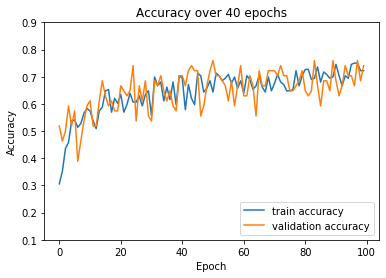

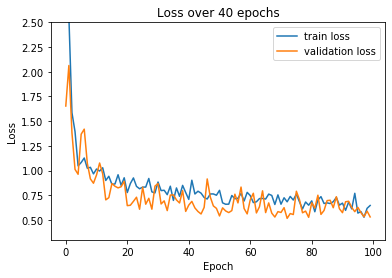

In [6]:
import matplotlib.pyplot as plt

# raise NotImplementedError("Plot the accuracy and the loss during training")

# Accuracy over 40 Epochs
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy') 
plt.plot(history.history['val_accuracy'], label = 'validation accuracy') 
plt.title('Accuracy over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.ylim([0.1, 0.9]) 
plt.legend(loc='lower right')

# Loss over 40 Epochs
plt.figure()
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label = 'validation loss') 
plt.title('Loss over 40 epochs')
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.ylim([0.3, 2.5]) 
plt.legend(loc='upper right')

#### Testing Model

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = covid_model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
36/36 [==============================] - 1s 31ms/step - loss: 0.7991 - accuracy: 0.6944: 0s - loss: 0.9705 - accura
Test loss: 0.799088882822174
Test accuracy: 0.6944444


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
270/270 [==============================] - 5s 20ms/step
(270, 256)
(270, 2)


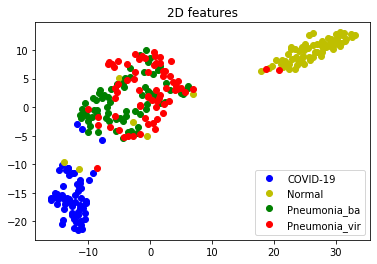

In [8]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=covid_model.input,
                                        outputs=covid_model.get_layer('dense_1').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the four classes.")

outputs = intermediate_layer_model.predict_generator(tsne_eval_generator,270,verbose=1)
print(outputs.shape)
label = tsne_eval_generator.classes
features = TSNE(n_components=2).fit_transform(outputs)
print(features.shape)

covid_x = []
covid_y = []
normal_x = []
normal_y = []
pneumonia_bac_x = []
pneumonia_bac_y = []
pneumonia_vir_x = []
pneumonia_vir_y = []

plt.figure()
for index in range(len(features)):
    if label[index] == 0:
        # COVID: Blue
        covid_x.append(features[index, 0])
        covid_y.append(features[index, 1])        
    elif label[index] == 1:
        # Normal: Yellow
        normal_x.append(features[index, 0])
        normal_y.append(features[index, 1]) 
    elif label[index] == 2:
        # Pneumonia_bac: Green
        pneumonia_bac_x.append(features[index, 0])
        pneumonia_bac_y.append(features[index, 1]) 
    else:
        # Pneumonia_vir: Red
        pneumonia_vir_x.append(features[index, 0])
        pneumonia_vir_y.append(features[index, 1]) 

plt.title('2D features')
plt.plot(covid_x, covid_y, 'bo', label="COVID-19")
plt.plot(normal_x, normal_y, 'yo', label="Normal")
plt.plot(pneumonia_bac_x, pneumonia_bac_y, 'go', label="Pneumonia_ba")
plt.plot(pneumonia_vir_x, pneumonia_vir_y, 'ro', label="Pneumonia_vir")
plt.legend(loc='lower right')